### For revision, compare sQTL in Walker and HDBR

In [1]:
library(tidyverse)
library(data.table)
library(VennDiagram)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

Loading required package: futile.logger



In [2]:
walker <- data.frame("HCP" = seq(5, 40, 5),
                     "Count" = NA)
for (i in seq(5, 40, 5)) {
    walker[i/5, "Count"] <- read.table(paste0("../results/Walker_nominal_", i, 
                                              "hcp/significant_feature_count.txt"))[,1]
}

In [3]:
walker

HCP,Count
<dbl>,<int>
5,27959
10,29596
15,29131
20,28341
25,27222
30,26460
35,25151
40,23763


In [4]:
hdbr <- data.frame("HCP" = seq(5, 40, 5),
                     "Count" = NA)
for (i in seq(5, 40, 5)) {
    hdbr[i/5, "Count"] <- read.table(paste0("../results/HDBR_nominal_", i, 
                                              "hcp/significant_feature_count.txt"))[,1]
}

In [5]:
hdbr

HCP,Count
<dbl>,<int>
5,57396
10,59665
15,60486
20,60857
25,58730
30,57253
35,55620
40,53572


In [6]:
walker$Study <- "Walker"
hdbr$Study <- "HDBR"
df <- rbind(walker, hdbr)

In [15]:
walker_seg <- data.frame(x = 10, y = 0, xend = 10, yend = 29596, Study = "Walker")
hdbr_seg <- data.frame(x = 20, y = 0, xend = 20, yend = 60857, Study = "HDBR")

seg <- rbind(walker_seg, hdbr_seg)

In [19]:
seg

x,y,xend,yend,Study
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,0,10,29596,Walker
20,0,20,60857,HDBR


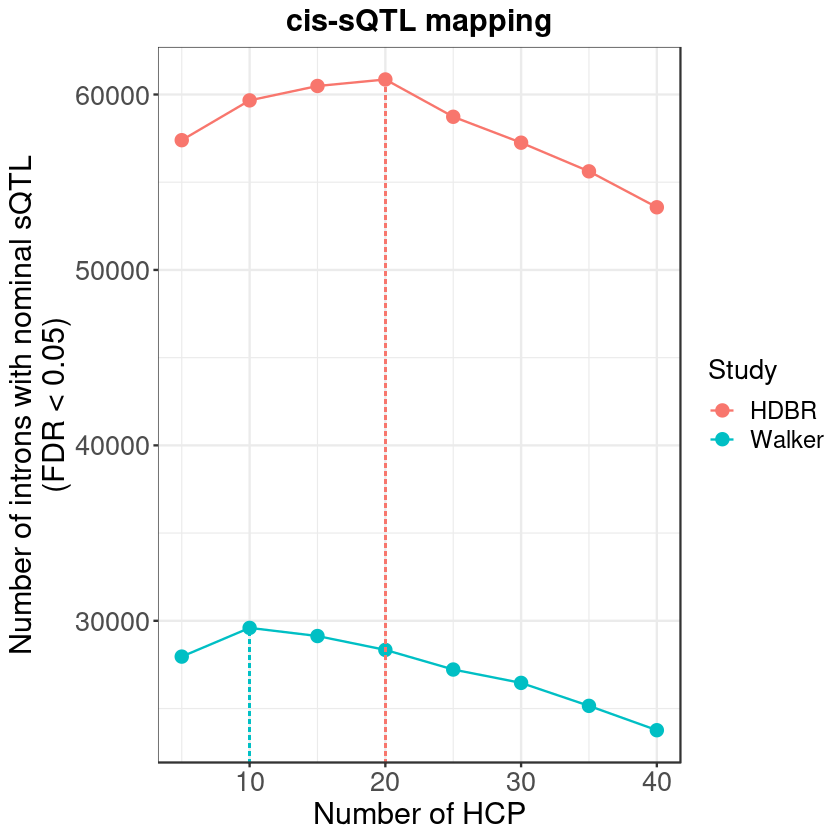

In [25]:
p1 <- ggplot(df, aes(x = HCP, y = Count, color = Study)) +
    geom_point(size = 3) +
    geom_line() +
    labs(x = "Number of HCP", 
         y = "Number of introns with nominal sQTL\n(FDR < 0.05)", 
         title = "cis-sQTL mapping") +
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
    geom_segment(x = 10, y = 0, xend = 10, yend = 29596, color = "#00BFC4", linetype = "dashed") +
    geom_segment(x = 20, y = 0, xend = 20, yend = 60857, color = "#F8766D", linetype = "dashed")
p1

In [26]:
ggsave("../figures/walker_hdbr.pdf", p1, height = 6, width = 7)

In [2]:
walker_sig <- read.table("../results/Walker_perm_10hcp/sig_pheno.txt", header = T)
hdbr_sig <- read.table("../results/HDBR_perm_20hcp/sig_pheno.txt", header = T)

In [29]:
length(unique(walker_sig$pid))
length(unique(hdbr_sig$pid))
sum(unique(walker_sig$pid) %in% unique(hdbr_sig$pid))

[1] 10073

[1] 25118

[1] 4059

png 
  2

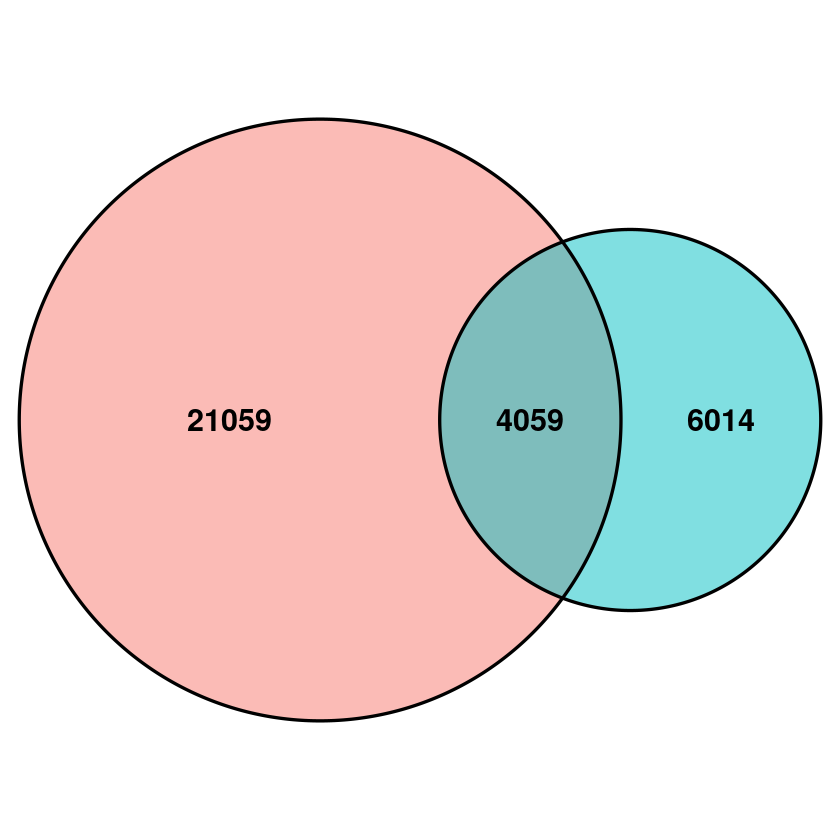

In [36]:
venn.plot <- draw.pairwise.venn(10073, 25118, 4059, 
                              fill = c("#00BFC4", "#F8766D"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
#                               category = c("walker", "HDBR"), 
                              scaled = TRUE,
                              )
pdf("../figures/walker_hdbr_permsig_intron.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [3]:
df <- walker_sig %>% inner_join(hdbr_sig, by = "pid")
dim(df)

[1] 4059   25

`geom_smooth()` using formula = 'y ~ x'


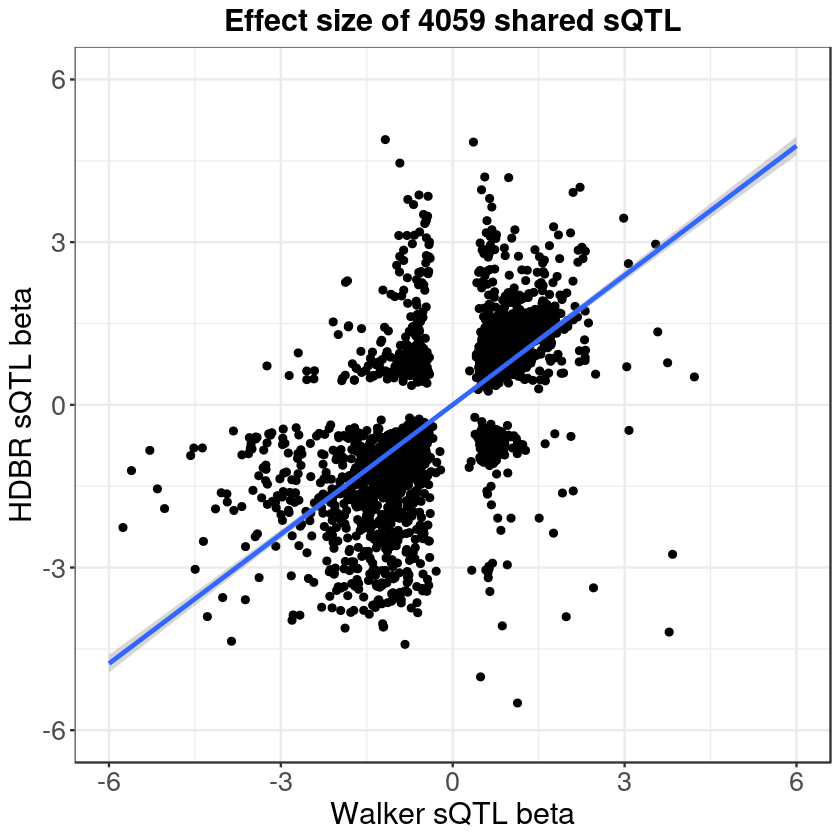

In [4]:
p2 <- ggplot(df, aes(x = slope.x, y = slope.y)) +
    geom_point() +
    geom_smooth(method = "lm", fullrange = TRUE) +
    labs(x = "Walker sQTL beta", 
         y = "HDBR sQTL beta", 
         title = "Effect size of 4059 shared sQTL") +
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    xlim(-6, 6) +
    ylim(-6, 6)
p2

**Pearson correlation of shared intron-QTL pairs' beta**

In [5]:
cor(df$slope.x, df$slope.y)

[1] 0.6667475

**sGene**

In [6]:
load("../leafviz_annot/all.introns.tested.RData")
head(pheno)

,ID,verdict,gene,ensemblID,transcripts,constitutive.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1:14829:14930:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
2,1:14829:14970:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
3,1:14829:15021:clu_7637_NA,cryptic_unanchored,WASH7P,ENSG00000227232.5_3,NA,0.5
4,1:14829:15796:clu_7637_NA,cryptic_threeprime,WASH7P,ENSG00000227232.5_3,.,0.0
5,1:15038:15796:clu_7637_NA,annotated,WASH7P,ENSG00000227232.5_3,ENST00000488147.1_2,0.5
6,1:15942:16607:clu_7638_NA,cryptic_threeprime,WASH7P,ENSG00000227232.5_3,.,0.0


In [7]:
walker_sig <- walker_sig %>% inner_join(pheno, by = c("pid" = "ID"))
hdbr_sig <- hdbr_sig %>% inner_join(pheno, by = c("pid" = "ID"))
length(unique(walker_sig$ensemblID))
length(unique(hdbr_sig$ensemblID))

[1] 4151

[1] 8168

In [9]:
walker_sig <- walker_sig %>% unite("gene_qtl", ensemblID, sid, sep = "-")
hdbr_sig <- hdbr_sig %>% unite("gene_qtl", ensemblID, sid, sep = "-")
df1 <- walker_sig %>% inner_join(hdbr_sig, by = "gene_qtl")
dim(df1)

[1] 3857   33

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


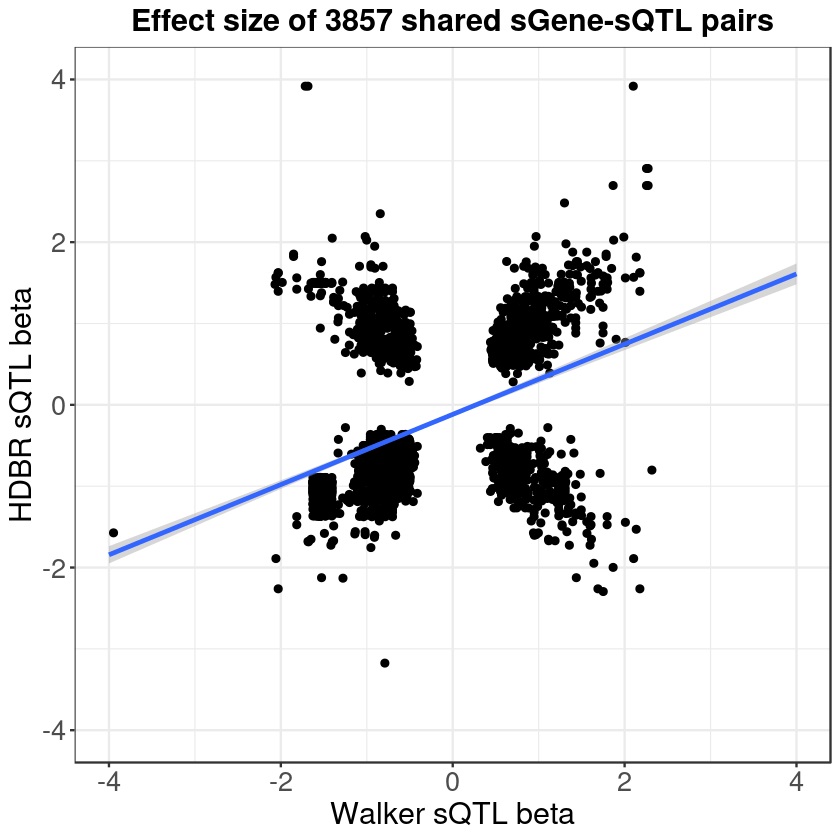

In [11]:
ggplot(df1, aes(x = slope.x, y = slope.y)) +
    geom_point() +
    geom_smooth(method = "lm", fullrange = TRUE) +
    labs(x = "Walker sQTL beta", 
         y = "HDBR sQTL beta", 
         title = "Effect size of 3857 shared sGene-sQTL pairs") +
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5)) +
    xlim(-4, 4) +
    ylim(-4, 4)

In [12]:
cor(df1$slope.x, df1$slope.y)

[1] 0.4273435